In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from ECG_function import *
%matplotlib inline

## Data Importing

In [2]:
Xtrain,Ytrain,Xtest = DataImporting()
lable = Ytrain.TARGET.values

## Feature Collection

In [3]:
import pywt
from scipy.fftpack import dct

AllFeatures_wt_fft = [[[[],[]] for k in range(12)   ] for i in range(1000)]
AllFeatures_fft = [[[]for k in range(12)]for id in range(1000) ]
AllFeatures_wt = [[[]for k in range(12)]for id in range(1000) ]
for id in range(1000):
    for k in range(12):
        
        AllFeatures_wt_fft[id][k] = dct(list(pywt.dwt(DataSample(Xtrain,id,k+1).values, 'db2')),norm = "ortho")
        AllFeatures_fft[id][k] = dct(DataSample(Xtrain,id,k+1),norm = "ortho")
        AllFeatures_wt[id][k] = list(pywt.dwt(DataSample(Xtrain,id,k+1).values, 'db2'))

## comparasion

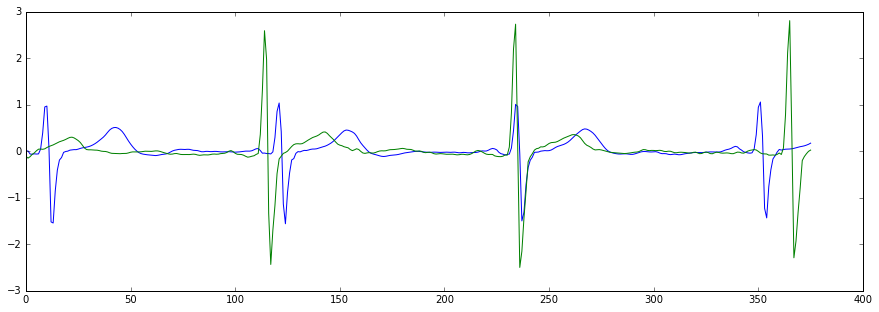

In [4]:
channel = 9
testid = [1,7]
plt.figure(figsize=[15,5])
for id in testid:
    plt.plot(AllFeatures_wt[id][channel-1][0])

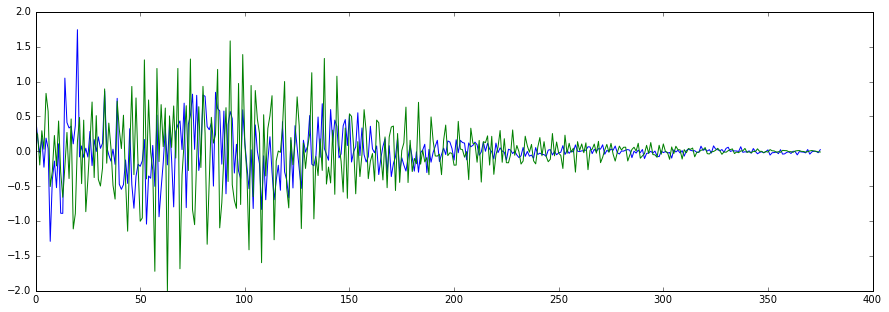

In [5]:
plt.figure(figsize=[15,5])
for id in testid:
    plt.plot(AllFeatures_wt_fft[id][channel-1][0])

In [6]:
Ytrain[0:10]

,ID,TARGET
0,0,1
1,1,1
2,2,1
3,3,1
4,4,0
5,5,1
6,6,0
7,7,0
8,8,1
9,9,1


# Cut the wave !
we will choose features AllFeatures_wt.

In [256]:
id = 1
channel = 10
num_peak = 5
a = np.abs(AllFeatures_wt[id][channel-1][0][125:250]).argsort()[-num_peak:][::-1]

In [257]:
print a
AllFeatures_wt[id][channel-1][0][a]

[110 111 109 113   0]


array([ 0.03983238,  0.04000183,  0.03629344, -0.05578198, -0.00213658])

## Action Potential extraction

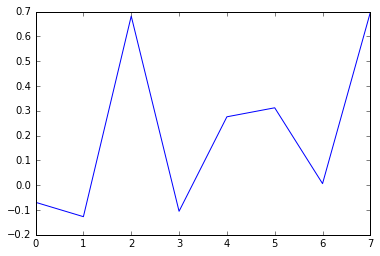

In [29]:
channel = 9
testid = [1,7]
# plt.figure(figsize=[15,5])
# for id in testid:
#     plt.plot(AllFeatures_wt[id][channel-1][0])

id = 1     
a = list(pywt.dwt(AllFeatures_wt[id][channel-1][0], 'db2'))[0]
a = list(pywt.dwt(a,'db2')[0])
a = list(pywt.dwt(a,'db2')[0])
a = list(pywt.dwt(a,'db2')[0])
a = list(pywt.dwt(a,'db2')[0])
a = list(pywt.dwt(a,'db2')[0])





plt.plot(a)

(1000, 9, 750)


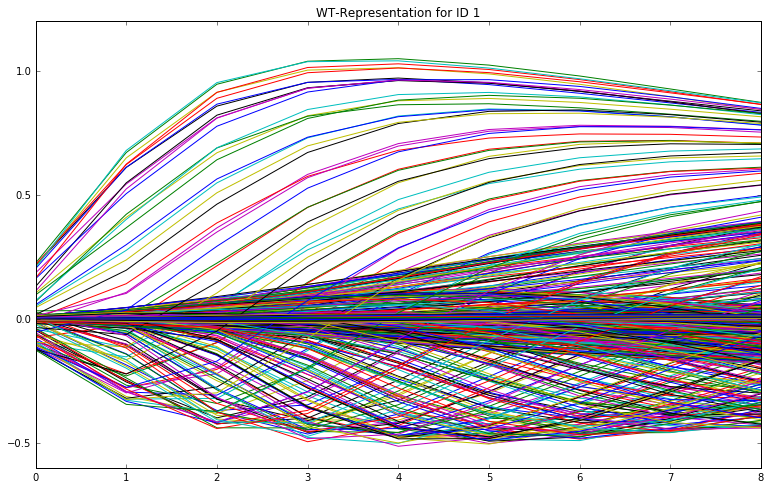

In [31]:
from scipy import signal
AllFeatures_cwt =[[] for i in range(1000)]
for id in range(1000):
    for k in range(1,13):
        AllFeatures_cwt[id] = list(signal.cwt(np.array(DataSample(Xtrain,id,k).values), signal.ricker,np.arange(1,10)))
print np.shape(AllFeatures_cwt)

plt.figure(figsize=(13,8))
plt.plot(AllFeatures_cwt[1])
plt.title("WT-Representation for ID 1")        

In [32]:
np.shape(AllFeatures_cwt[1])

(9, 750)

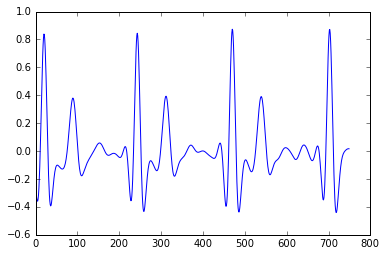

In [749]:
a = AllFeatures_cwt[1]
plt.plot(a[8])

In [999]:
a = DataSample(Xtrain,35,12).values[:]
def neighbour(newobj,listindex,threshold = 10):
    for obj in listindex:
        if np.abs(newobj-obj)<threshold:
            return True

In [1000]:
def PeriodSpliter(wave,threshold =1.0/10):
    set_peak = [np.argmax(np.abs(wave[:300]))]
    max_peak = wave[set_peak[0]]
    for i in range(len(wave)):
        if np.abs(wave[i]-max_peak) <= 1.0/4*np.abs(max_peak) and neighbour(i,set_peak) != True :
            set_peak.append(i)
    num_peak = len(set_peak)     
    start_interval = range(np.min(set_peak))
    

    
    
    if num_peak == 1 or num_peak == 2 or num_peak>5:
        
        num_peak = 3     
        start_interval = range(50)
        
        
        
    period_interval = range(750/(num_peak+1),750/(num_peak-1),1)
    sd = [[[]for period in period_interval] for start in start_interval]
    for start in start_interval:
        for period in period_interval:
            if np.abs(wave[start])<threshold*np.abs(np.max(wave)) and start + period*2<750:
                sd[start][period-period_interval[0]] = np.std(wave[start:start+period]-wave[start+period:start+period*2])
            else:
                sd[start][period-period_interval[0]] = float('inf')

    sdlist = []
    for start in sd:
        sdlist += start
    start,period = np.argmin(sd)/len(period_interval),np.argmin(sd)%len(period_interval)+period_interval[0]
    
    print "number of peaks : ",num_peak
    print "start at :", start
    print 'period :', period
    return wave[start :start + period]


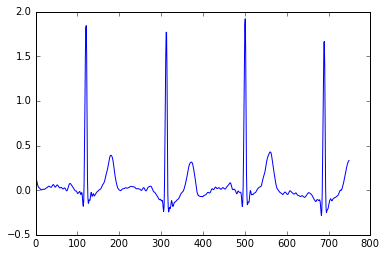

In [997]:
plt.plot(a)

number of peaks :  4
start at : 43
period : 192


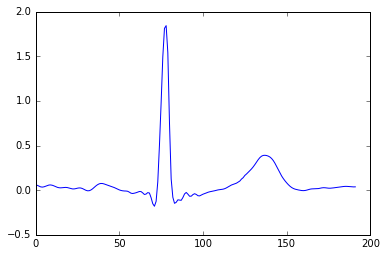

In [998]:
plt.plot(PeriodSpliter(a))

In [954]:
7/3

2

In [977]:
AllFeatures_period_split = [[[]for k in range(12)]for i in range(1000)]
for id in range(10):
    for k in range(12):
        AllFeatures_period_split[id][k] = PeriodSpliter(DataSample(Xtrain,id,k+1).values)
        print id,k
        
        

number of peaks :  3
start at : 126
period : 214
0 0
number of peaks :  3
start at : 126
period : 214
0 1
number of peaks :  5
start at : 31
period : 186
0 2
number of peaks :  3
start at : 126
period : 214
0 3
number of peaks :  3
start at : 126
period : 214
0 4
number of peaks :  3
start at : 126
period : 214
0 5
number of peaks :  3
start at : 122
period : 214
0 6
number of peaks :  3
start at : 134
period : 214
0 7
number of peaks :  3
start at : 135
period : 214
0 8
number of peaks :  3
start at : 137
period : 213
0 9
number of peaks :  3
start at : 135
period : 214
0 10
number of peaks :  3
start at : 77
period : 214
0 11
number of peaks :  4
start at : 0
period : 222
1 0
number of peaks :  4
start at : 0
period : 222
1 1
number of peaks :  4
start at : 1
period : 222
1 2
number of peaks :  4
start at : 0
period : 222
1 3
number of peaks :  4
start at : 0
period : 222
1 4
number of peaks :  4
start at : 0
period : 222
1 5
number of peaks :  4
start at : 14
period : 222
1 6
number

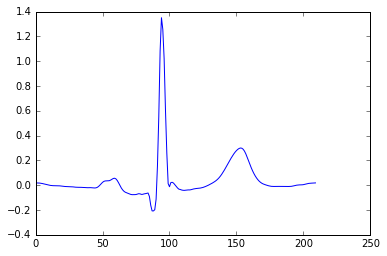

In [991]:
id = 4
k = 5
plt.plot(AllFeatures_period_split[id][k])

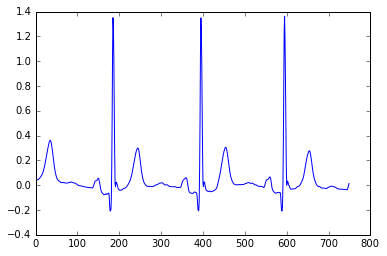

In [992]:
plt.plot(DataSample(Xtrain,id,k+1).values[:])